In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint

In [2]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1 
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [3]:
cancer = load_breast_cancer()
# print(f"{cancer.target_names=}")
# print(f"{type(cancer.target)=}, {cancer.target=}")

# count total instances of 0 in cancer.target numpy array
# and divide it by total number of instances to get the ratio of malignant instances
malignant_ratio = np.sum(cancer.target == 0) / len(cancer.target)
print(f"Malignant ratio: {malignant_ratio:.4f}")

Malignant ratio: 0.3726


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a) 
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


In [4]:
# For max_depth from 1 to 10, create and train a decision tree classifier
depth_accuracy = defaultdict(float)
cv_accuracy = defaultdict(float)
best_cv_score = 0.0
best_dt_clf = None
X = cancer.data
y = cancer.target
for depth in range(1, 11):
    # create a decision tree classifier with max depth depth
    dt_clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)

    # print(f"X.shape: {X.shape}, y.shape: {y.shape}, type(y): {type(y)}, type(X): {type(X)}")
    dt_clf.fit(X, y)

    # For each X, predict the class label and store it in y_pred
    y_pred = dt_clf.predict(X)
    # print(f"y_pred.shape: {y_pred.shape}, type(y_pred): {type(y_pred)}")
    # Calculate the accuracy of the model
    accuracy = np.sum(y_pred == y) / len(y)
    print(f"depth: {depth}, Decision Tree Classifier Accuracy: {accuracy:.4f}")
    depth_accuracy[depth] = accuracy
    # calculate 10-fold cross validation accuracy
    kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
    cv_scores = cross_val_score(dt_clf, X, y, cv=kf)
    # print(f"CV Scores: {cv_scores}, type(cv_scores): {type(cv_scores)}")
    print(f"depth: {depth}, Decision Tree Classifier 10-Fold CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    cv_accuracy[depth] = np.mean(cv_scores)
    # keep track of the best cv 
    # score and the corresponding decision tree classifier
    if np.mean(cv_scores) > best_cv_score:
        best_cv_score = np.mean(cv_scores)
        best_dt_clf = dt_clf
    
# Visualize the best decision tree with least cv error
best_depth = max(cv_accuracy, key=cv_accuracy.get)
print(f"Best depth: {best_depth} with CV Accuracy: {cv_accuracy[best_depth]:.4f}")

# Plot the decision tree for visual understanding
# plt.figure(figsize=FIGSIZE)
# tree.plot_tree(best_dt_clf, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names)
# plt.title(f"Decision Tree Classifier (max_depth={best_depth})")
# plt.show()

depth: 1, Decision Tree Classifier Accuracy: 0.9227
depth: 1, Decision Tree Classifier 10-Fold CV Accuracy: 0.8944 ± 0.0488
depth: 2, Decision Tree Classifier Accuracy: 0.9420
depth: 2, Decision Tree Classifier 10-Fold CV Accuracy: 0.9226 ± 0.0382
depth: 3, Decision Tree Classifier Accuracy: 0.9789
depth: 3, Decision Tree Classifier 10-Fold CV Accuracy: 0.9191 ± 0.0410
depth: 4, Decision Tree Classifier Accuracy: 0.9824
depth: 4, Decision Tree Classifier 10-Fold CV Accuracy: 0.9208 ± 0.0381
depth: 5, Decision Tree Classifier Accuracy: 0.9947
depth: 5, Decision Tree Classifier 10-Fold CV Accuracy: 0.9244 ± 0.0409
depth: 6, Decision Tree Classifier Accuracy: 0.9982
depth: 6, Decision Tree Classifier 10-Fold CV Accuracy: 0.9226 ± 0.0468
depth: 7, Decision Tree Classifier Accuracy: 1.0000
depth: 7, Decision Tree Classifier 10-Fold CV Accuracy: 0.9243 ± 0.0467
depth: 8, Decision Tree Classifier Accuracy: 1.0000
depth: 8, Decision Tree Classifier 10-Fold CV Accuracy: 0.9226 ± 0.0461
depth: 9

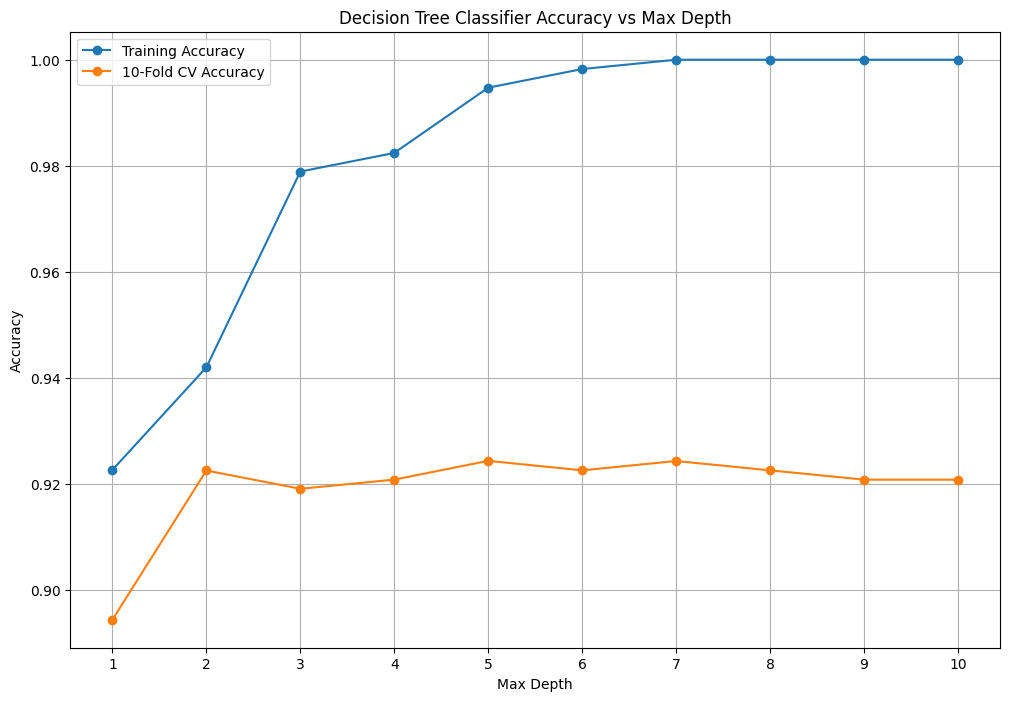

In [5]:

# Plot accuracy and cv_accuracy against each depth
plt.figure(figsize=FIGSIZE)
plt.plot(list(depth_accuracy.keys()), list(depth_accuracy.values()), label='Training Accuracy', marker='o')
plt.plot(list(cv_accuracy.keys()), list(cv_accuracy.values()), label='10-Fold CV Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy vs Max Depth')
plt.xticks(range(1, 11))
plt.legend()
plt.grid()
plt.show()

### (b) 
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here: [7,8,9,10]** 

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here: 5** 



## 3\. 
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a) 
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

In [6]:
cv_accuracy = defaultdict(float)
# For n_estimators from 1 to 20, create and train a random forest classifier
for n_estimators in range(1,21):
    rf_clf = ensemble.RandomForestClassifier(n_estimators=n_estimators, random_state=RANDOM_STATE, max_depth=best_depth)
    rf_clf.fit(X, y)
    y_pred = rf_clf.predict(X)
    accuracy = np.sum(y_pred == y) / len(y)
    print(f"n_estimators: {n_estimators}, Random Forest Classifier Accuracy: {accuracy:.4f}")
    # calculate 10-fold cross validation accuracy
    kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
    cv_scores = cross_val_score(rf_clf, X, y, cv=kf)
    print(f"n_estimators: {n_estimators}, Random Forest Classifier 10-Fold CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    cv_accuracy[n_estimators] = np.mean(cv_scores)

# get the best n_estimators based on cv accuracy
best_n_estimators = max(cv_accuracy, key=cv_accuracy.get)
print(f"Best n_estimators: {best_n_estimators} with CV Accuracy: {cv_accuracy[best_n_estimators]:.4f}")

n_estimators: 1, Random Forest Classifier Accuracy: 0.9649
n_estimators: 1, Random Forest Classifier 10-Fold CV Accuracy: 0.9173 ± 0.0506
n_estimators: 2, Random Forest Classifier Accuracy: 0.9754
n_estimators: 2, Random Forest Classifier 10-Fold CV Accuracy: 0.9297 ± 0.0315
n_estimators: 3, Random Forest Classifier Accuracy: 0.9807
n_estimators: 3, Random Forest Classifier 10-Fold CV Accuracy: 0.9454 ± 0.0331
n_estimators: 4, Random Forest Classifier Accuracy: 0.9842
n_estimators: 4, Random Forest Classifier 10-Fold CV Accuracy: 0.9489 ± 0.0269
n_estimators: 5, Random Forest Classifier Accuracy: 0.9877
n_estimators: 5, Random Forest Classifier 10-Fold CV Accuracy: 0.9454 ± 0.0312
n_estimators: 6, Random Forest Classifier Accuracy: 0.9859
n_estimators: 6, Random Forest Classifier 10-Fold CV Accuracy: 0.9507 ± 0.0325
n_estimators: 7, Random Forest Classifier Accuracy: 0.9842
n_estimators: 7, Random Forest Classifier 10-Fold CV Accuracy: 0.9472 ± 0.0327
n_estimators: 8, Random Forest Cla

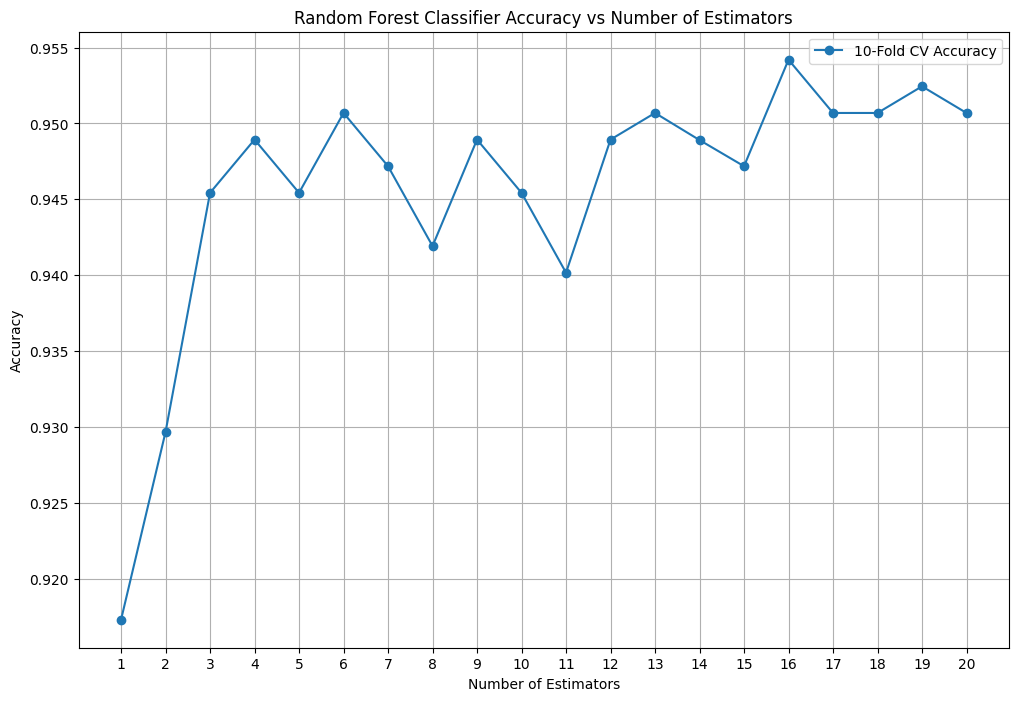

In [7]:
# Plot cv_accuracy against each n_estimators
plt.figure(figsize=FIGSIZE)
plt.plot(list(cv_accuracy.keys()), list(cv_accuracy.values()), label='10-Fold CV Accuracy', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy vs Number of Estimators')
plt.xticks(range(1, 21))
plt.legend()
plt.grid()
plt.show()

### (b) 
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here: yes** 

### (c) 
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here: 16** 

### (d) 
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

In [8]:
cv_accuracy = defaultdict(float)
# For depth from 1 to 10, and with n_estimators fixed to 16, based on previous results
for depth in range(1,11):
    rf_clf = ensemble.RandomForestClassifier(n_estimators=best_n_estimators, random_state=RANDOM_STATE, max_depth=depth)
    rf_clf.fit(X, y)
    y_pred = rf_clf.predict(X)
    accuracy = np.sum(y_pred == y) / len(y)
    print(f"depth: {depth}, Random Forest Classifier Accuracy: {accuracy:.4f}")
    # calculate 10-fold cross validation accuracy
    kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
    cv_scores = cross_val_score(rf_clf, X, y, cv=kf)
    print(f"depth: {depth}, Random Forest Classifier 10-Fold CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    cv_accuracy[depth] = np.mean(cv_scores)

# best depth based on cv accuracy
best_depth = max(cv_accuracy, key=cv_accuracy.get)
print(f"Best depth: {best_depth} with CV Accuracy: {cv_accuracy[best_depth]:.4f}")


depth: 1, Random Forest Classifier Accuracy: 0.9227
depth: 1, Random Forest Classifier 10-Fold CV Accuracy: 0.9173 ± 0.0435
depth: 2, Random Forest Classifier Accuracy: 0.9561
depth: 2, Random Forest Classifier 10-Fold CV Accuracy: 0.9437 ± 0.0416
depth: 3, Random Forest Classifier Accuracy: 0.9754
depth: 3, Random Forest Classifier 10-Fold CV Accuracy: 0.9471 ± 0.0338
depth: 4, Random Forest Classifier Accuracy: 0.9824
depth: 4, Random Forest Classifier 10-Fold CV Accuracy: 0.9471 ± 0.0428
depth: 5, Random Forest Classifier Accuracy: 0.9895
depth: 5, Random Forest Classifier 10-Fold CV Accuracy: 0.9542 ± 0.0347
depth: 6, Random Forest Classifier Accuracy: 0.9930
depth: 6, Random Forest Classifier 10-Fold CV Accuracy: 0.9577 ± 0.0347
depth: 7, Random Forest Classifier Accuracy: 0.9965
depth: 7, Random Forest Classifier 10-Fold CV Accuracy: 0.9524 ± 0.0363
depth: 8, Random Forest Classifier Accuracy: 0.9982
depth: 8, Random Forest Classifier 10-Fold CV Accuracy: 0.9524 ± 0.0371
depth: 9

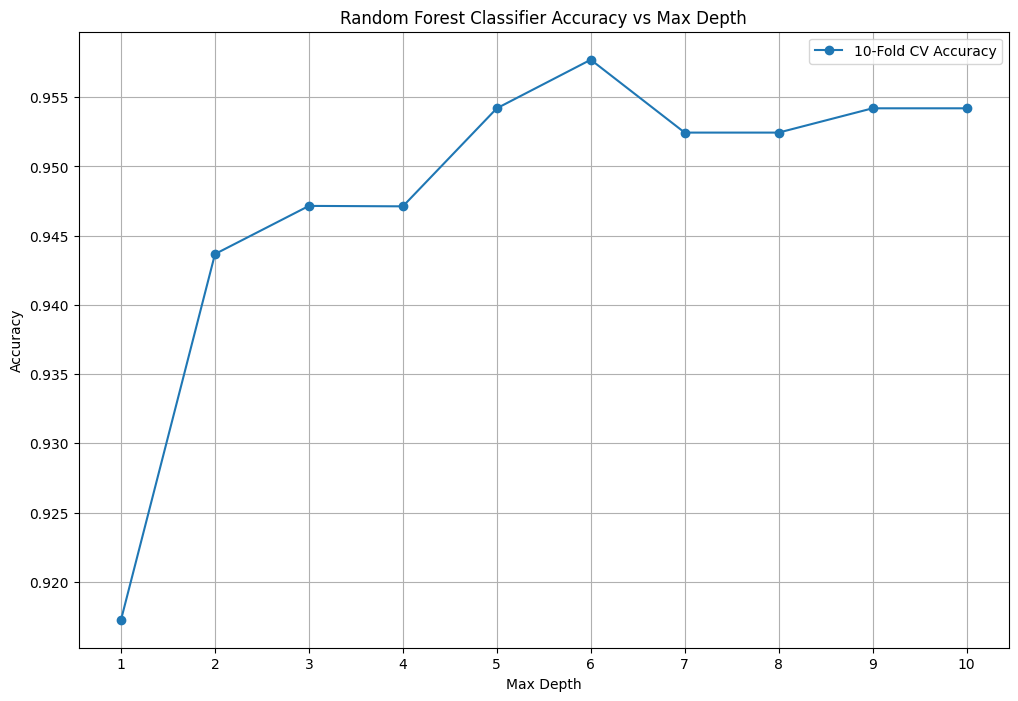

In [9]:
# Plot cv_accuracy against each depth
plt.figure(figsize=FIGSIZE)
plt.plot(list(cv_accuracy.keys()), list(cv_accuracy.values()), label='10-Fold CV Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy vs Max Depth')
plt.xticks(range(1, 11))
plt.legend()
plt.grid()
plt.show()

### (e) 
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here: No, new optimal max_depth is 6** 

## 4\. 
For this last question, we will explore the dependability of our estimates. 
### (a) 
Make a plot using the following procedure:
#### i. 
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii. 
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

In [10]:
# for different random state, check the best max_depth for decision tree classifier
random_state_max_value = 100
max_depth_count = defaultdict(int)
for random_state in range(0,random_state_max_value):
    cv_accuracy = defaultdict(float)
    for depth in range(1, 11):
        dt_clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=random_state)
        dt_clf.fit(X, y)
        y_pred = dt_clf.predict(X)
        kf = KFold(n_splits=10, shuffle=True, random_state=random_state)
        cv_scores = cross_val_score(dt_clf, X, y, cv=kf)
        cv_accuracy[depth] = np.mean(cv_scores)
    # get the depth with the best cv accuracy(inluding ties)
    best_depth = []
    max_cv = max(cv_accuracy.values())
    for depth in cv_accuracy:
        if cv_accuracy[depth] == max_cv:
            best_depth.append(depth)
    # increment max_depth_count for each best_depth found
    for depth in best_depth:
        max_depth_count[depth] += 1
    print(f"Random State: {random_state}, Best Depth: {best_depth} with CV Accuracy: {cv_accuracy[best_depth[0]]:.4f}")
print("Count against best depths:")


Random State: 0, Best Depth: [7] with CV Accuracy: 0.9351
Random State: 1, Best Depth: [4, 7] with CV Accuracy: 0.9402
Random State: 2, Best Depth: [6] with CV Accuracy: 0.9367
Random State: 3, Best Depth: [2, 5] with CV Accuracy: 0.9297
Random State: 4, Best Depth: [6] with CV Accuracy: 0.9350
Random State: 5, Best Depth: [6] with CV Accuracy: 0.9313
Random State: 6, Best Depth: [6] with CV Accuracy: 0.9438
Random State: 7, Best Depth: [6] with CV Accuracy: 0.9386
Random State: 8, Best Depth: [6] with CV Accuracy: 0.9385
Random State: 9, Best Depth: [4] with CV Accuracy: 0.9439
Random State: 10, Best Depth: [5] with CV Accuracy: 0.9244
Random State: 11, Best Depth: [5] with CV Accuracy: 0.9385
Random State: 12, Best Depth: [5] with CV Accuracy: 0.9402
Random State: 13, Best Depth: [2] with CV Accuracy: 0.9297
Random State: 14, Best Depth: [5, 6] with CV Accuracy: 0.9262
Random State: 15, Best Depth: [6] with CV Accuracy: 0.9403
Random State: 16, Best Depth: [5] with CV Accuracy: 0.926

In [11]:
for depth in sorted(max_depth_count.keys()):
    print(f"Depth {depth}: {max_depth_count[depth]} times")

Depth 2: 4 times
Depth 3: 5 times
Depth 4: 30 times
Depth 5: 37 times
Depth 6: 26 times
Depth 7: 11 times
Depth 8: 3 times
Depth 9: 2 times
Depth 10: 2 times


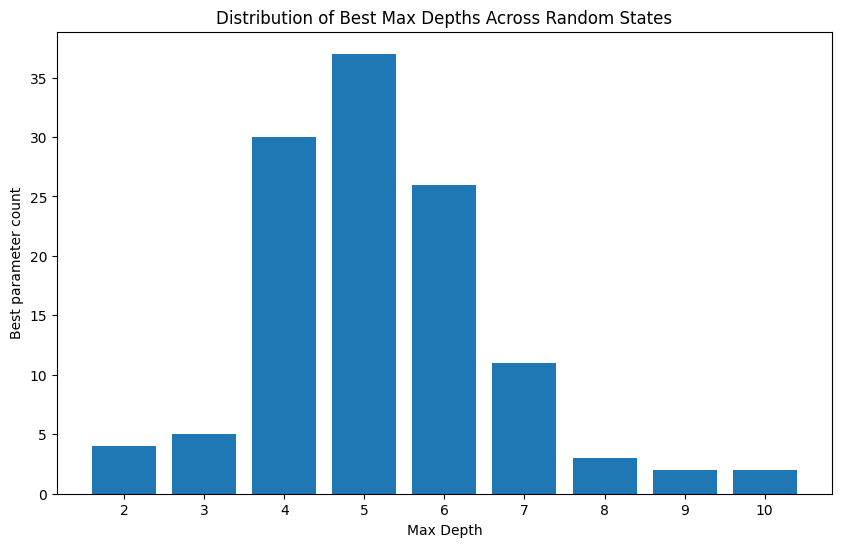

In [12]:
# plot the max_depth_count as a bar chart 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(max_depth_count.keys(), max_depth_count.values())
plt.xlabel("Max Depth")
plt.ylabel("Best parameter count")
plt.title("Distribution of Best Max Depths Across Random States")
plt.xticks(list(max_depth_count.keys()))
plt.show()

### (b) 
What are the top two most frequent parameter settings?

**Student answer here: 4 and 5** 